In [1]:
%load_ext autoreload
%autoreload 2
%tb

No traceback available to show.


In [2]:
import networkx as nx
from graph2plan.fourtp.four_complete import test_four_complete
from graph2plan.fourtp.canonical_order import initialize_canonical_order



{'NE': 'v6', 'SE': 'v0', 'SW': 'v1', 'NW': 'v7'}
[('NORTH', ['v7', 'v4', 'v6']),
 ('EAST', ['v6', 'v5', 'v0']),
 ('SOUTH', ['v0', 'v1']),
 ('WEST', ['v1', 'v7'])]


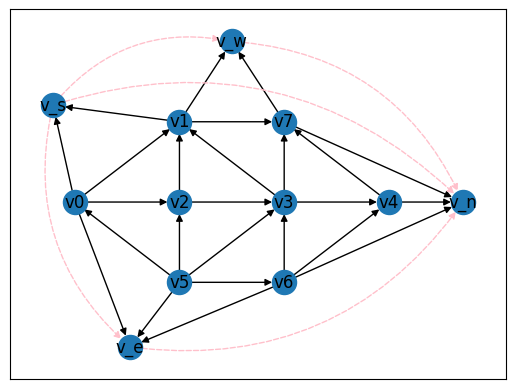

In [6]:
G, full_pos =  test_four_complete()

In [20]:
initialize_canonical_order(G)

[('v_e', 2) | is_marked: False, n_marked_nbs: 0, n_chords: 0 ,
 ('v_s', 1) | is_marked: False, n_marked_nbs: 0, n_chords: 0 ,
 ('v5', -1) | is_marked: False, n_marked_nbs: 0, n_chords: 0 ,
 ('v0', -1) | is_marked: False, n_marked_nbs: 0, n_chords: 0 ,
 ('v2', -1) | is_marked: False, n_marked_nbs: 0, n_chords: 0 ,
 ('v3', -1) | is_marked: False, n_marked_nbs: 0, n_chords: 0 ,
 ('v6', -1) | is_marked: False, n_marked_nbs: 0, n_chords: 0 ,
 ('v4', -1) | is_marked: False, n_marked_nbs: 0, n_chords: 0 ,
 ('v1', -1) | is_marked: False, n_marked_nbs: 0, n_chords: 0 ,
 ('v7', -1) | is_marked: False, n_marked_nbs: 0, n_chords: 0 ,
 ('v_n', -1) | is_marked: False, n_marked_nbs: 0, n_chords: 0 ,
 ('v_w', -1) | is_marked: False, n_marked_nbs: 0, n_chords: 0 ]
v_w is potential next
[('v_w', -1) | is_marked: False, n_marked_nbs: 2, n_chords: 0 ]
